# kerasでMNISTを解くサンプルコード

- 参考URL <br>
https://keras.io/examples/mnist_cnn/ <br>
https://qiita.com/Phoeboooo/items/f188eb2426afc8757272 <br>
https://analytics-note.xyz/machine-learning/fit-generator/

In [1]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, GlobalAveragePooling2D
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.initializers import he_normal

batch_size = 128
num_classes = 10
epochs = 10

# input image dimensions
img_rows, img_cols = 28, 28

Using TensorFlow backend.


In [2]:
# データ読み込み
# # the data, split between train and test sets
# (x_train, y_train), (x_test, y_test) = mnist.load_data()

# mnist.load_data()が失敗する場合、予めダウンロードしたmnistデータを読み込む
import numpy as np
x_train = np.load("../mnist/mnist.npz")['x_train']
y_train = np.load("../mnist/mnist.npz")['y_train']
x_test = np.load("../mnist/mnist.npz")['x_test']
y_test = np.load("../mnist/mnist.npz")['y_test']

In [3]:
# データ前処理
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

# 正規化
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices（1-hotベクトル化）
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [4]:
# モデルの生成
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape, kernel_initializer=he_normal()))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer=he_normal()))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer=he_normal()))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer=he_normal()))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# model.add(Flatten())
model.add(GlobalAveragePooling2D())

model.add(Dense(128, activation='relu', kernel_initializer=he_normal()))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax', kernel_initializer=he_normal()))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 5, 5, 64)         

In [5]:
# 学習と評価
history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test),
          callbacks=[])

# # データ拡張
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
# datagen = ImageDataGenerator(
#     rotation_range=30,
#     width_shift_range=0.2,
#     height_shift_range=0.2,
#     zoom_range = 0.2,
#     channel_shift_range = 0.2,
#     horizontal_flip=True,
# )

# # 拡張したデータを使って学習
# history = model.fit_generator(
#             datagen.flow(x_train, y_train, batch_size=batch_size),
#             epochs=epochs,
#             verbose=1,
#             validation_data=(x_test, y_test),
#         )

# 評価
score = model.evaluate(x_test, y_test, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/10
469/469 [==============================] - 79s 169ms/step - loss: 1.6487 - accuracy: 0.4226 - val_loss: 0.2112 - val_accuracy: 0.9436
Epoch 2/10
469/469 [==============================] - 77s 165ms/step - loss: 0.7559 - accuracy: 0.7573 - val_loss: 0.1162 - val_accuracy: 0.9656
Epoch 3/10
469/469 [==============================] - 78s 166ms/step - loss: 0.5433 - accuracy: 0.8316 - val_loss: 0.0905 - val_accuracy: 0.9731
Epoch 4/10
469/469 [==============================] - 80s 170ms/step - loss: 0.4526 - accuracy: 0.8615 - val_loss: 0.0976 - val_accuracy: 0.9711
Epoch 5/10
469/469 [==============================] - 78s 165ms/step - loss: 0.3911 - accuracy: 0.8803 - val_loss: 0.0723 - val_accuracy: 0.9784
Epoch 6/10
469/469 [==============================] - 74s 159ms/step - loss: 0.3578 - accuracy: 0.8928 - val_loss: 0.0577 - val_accuracy: 0.9821
Epoch 7/10
469/469 [==============================] - 77s 163ms/step - loss: 0.3302 - accuracy: 0.9019 - val_loss: 0.0510 - val_ac

C:\Users\kusafusa_k02\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:29: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


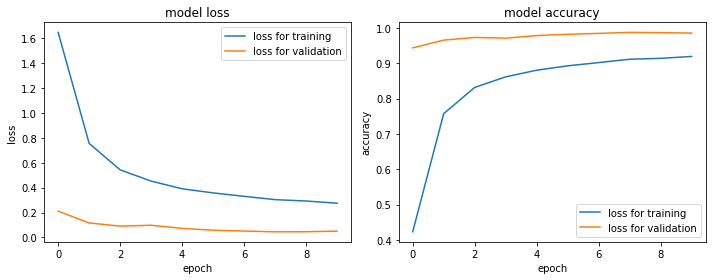

In [7]:
# グラフ化
from matplotlib import pyplot as plt
fig, (axL, axR) = plt.subplots(ncols=2, figsize=(10,4))

# loss
def plot_history_loss(fit):
    # Plot the loss in the history
    axL.plot(fit.history['loss'],label="loss for training")
    axL.plot(fit.history['val_loss'],label="loss for validation")
    axL.set_title('model loss')
    axL.set_xlabel('epoch')
    axL.set_ylabel('loss')
    axL.legend(loc='upper right')

# acc
def plot_history_acc(fit):
    # Plot the loss in the history
    axR.plot(fit.history['accuracy'],label="loss for training")
    axR.plot(fit.history['val_accuracy'],label="loss for validation")
    axR.set_title('model accuracy')
    axR.set_xlabel('epoch')
    axR.set_ylabel('accuracy')
    axR.legend(loc='lower right')

plot_history_loss(history)
plot_history_acc(history)

fig.tight_layout()
fig.show()